<a href="https://colab.research.google.com/github/ShowBaba/Machine-Learning-/blob/master/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [0]:
# load the datasets
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


NameError: ignored

In [0]:
import io

train_df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
test_df = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
z = test_df['EmployeeNo']
train_df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [0]:
train_df['Qualification'].unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

In [0]:
y = train_df.iloc[:, -1]

In [0]:
# merge the datasets for processing
df = [train_df, test_df]
df = pd.concat(df, keys=['x', 'y'])
df = df.drop(columns=['EmployeeNo', 'Promoted_or_Not'])
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Channel_of_Recruitment  ... Year_of_recruitment
x 0  Direct Internal process  ...                2011
  1        Agency and others  ...                2015
  2  Direct Internal process  ...                2012
  3        Agency and others  ...                2009
  4  Direct Internal process  ...                2012
  5        Agency and others  ...                2014
  6  Direct Internal process  ...                2013
  7        Agency and others  ...                2014
  8  Direct Internal process  ...                2014
  9  Direct Internal process  ...                2016

[10 rows x 17 columns]

In [0]:
# check for null values
df.isnull().sum()

Channel_of_Recruitment                    0
Division                                  0
Foreign_schooled                          0
Gender                                    0
Last_performance_score                    0
Marital_Status                            0
No_of_previous_employers                  0
Past_Disciplinary_Action                  0
Previous_Award                            0
Previous_IntraDepartmental_Movement       0
Qualification                          2409
State_Of_Origin                           0
Targets_met                               0
Training_score_average                    0
Trainings_Attended                        0
Year_of_birth                             0
Year_of_recruitment                       0
dtype: int64

In [0]:
# filling the null values based on the "Foreign_schooled " column
df_null = df.groupby('Targets_met').Qualification.transform(lambda x: x.fillna(x.mode()[0]))

In [0]:
# dropping the "Qualification" column that has null values and adding the clean coolumn
df = df.drop(columns=['Qualification'])
df['Qualification'] = df_null  

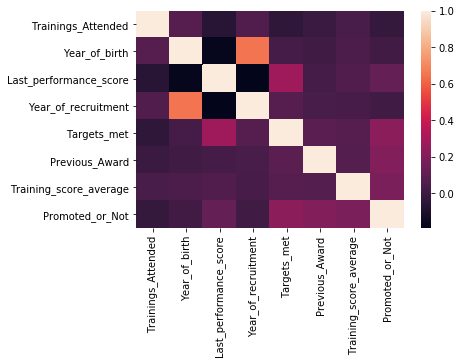

In [0]:
# data visualization
sns.heatmap(train_df.corr())

In [0]:
df.isnull().sum()

Channel_of_Recruitment                 0
Division                               0
Foreign_schooled                       0
Gender                                 0
Last_performance_score                 0
Marital_Status                         0
No_of_previous_employers               0
Past_Disciplinary_Action               0
Previous_Award                         0
Previous_IntraDepartmental_Movement    0
State_Of_Origin                        0
Targets_met                            0
Training_score_average                 0
Trainings_Attended                     0
Year_of_birth                          0
Year_of_recruitment                    0
Qualification                          0
dtype: int64

In [0]:
# collecting columns with categorical datas
cat_col = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat_col.append(i)
    else:
        pass
    
cat_col

['Channel_of_Recruitment',
 'Division',
 'Foreign_schooled',
 'Gender',
 'Marital_Status',
 'No_of_previous_employers',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'State_Of_Origin',
 'Qualification']

In [0]:
# using pandas's get dummies to encode
df = pd.get_dummies(df, columns=cat_col)
df.head()

Last_performance_score  ...  Qualification_Non-University Education
x 0                    12.5  ...                                       0
  1                    12.5  ...                                       0
  2                     7.5  ...                                       0
  3                     2.5  ...                                       0
  4                     7.5  ...                                       0

[5 rows x 77 columns]

In [0]:
df.shape

(54808, 77)

In [0]:
# splitting the dataset back to test and train using the keys 'x' & 'y'
train_df = df.loc['x']
test_df = df.loc['y']
train_df.shape
test_df.shape

(16496, 77)

In [0]:
train_df.shape

(38312, 77)

In [0]:
X = train_df.iloc[:, :]
# y = train_df.iloc[:, -1]
Z = test_df.iloc[:,:]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [0]:
import xgboost as xgb
import time


start_time = time.time()
clf = xgb.XGBClassifier(max_depth=5,
                n_estimators=2500,
                learning_rate=0.1, 
                colsample_bytree=0.9,
                min_child_weight = 3,
                seed=1200,
                booster='dart'
                
                )
                
clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc",
        eval_set=[(X_train, y_train), (X_test, y_test)])

pred = clf.predict(X_test, ntree_limit=10)

clf.score(X_train, y_train)
print(f'Done in {time.time() - start_time} seconds')

[0]	validation_0-auc:0.832766	validation_1-auc:0.810909
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.85007	validation_1-auc:0.835853
[2]	validation_0-auc:0.850923	validation_1-auc:0.837689
[3]	validation_0-auc:0.856394	validation_1-auc:0.839458
[4]	validation_0-auc:0.857242	validation_1-auc:0.840332
[5]	validation_0-auc:0.859734	validation_1-auc:0.842359
[6]	validation_0-auc:0.857511	validation_1-auc:0.839923
[7]	validation_0-auc:0.863541	validation_1-auc:0.84441
[8]	validation_0-auc:0.864257	validation_1-auc:0.84519
[9]	validation_0-auc:0.864576	validation_1-auc:0.845027
[10]	validation_0-auc:0.868193	validation_1-auc:0.851632
[11]	validation_0-auc:0.868949	validation_1-auc:0.851038
[12]	validation_0-auc:0.876959	validation_1-auc:0.863403
[13]	validation_0-auc:0.883988	validation_1-auc:0.873553
[14]	validation_0-auc:0.884381	validation_1-auc:0.873413
[

In [0]:
clf.score(X_train, y_train)
# 0.9430233425311358
# 0.9450696055684454

0.9434164733178654

In [0]:
# predictions = clf.predict(Z)
# prediction = pd.DataFrame(predictions)
# prediction.index = z
# prediction.index.name = 'EmployeeNo'
# prediction.columns=['Promoted_or_Not']
# prediction.to_csv('predictions_9X.csv')

In [0]:
uploaded = files.upload()

Saving hy.csv to hy.csv


In [0]:
# stacking

pred = clf.predict(Z)
merged = pd.read_csv('hy.csv')
merged_values = merged['Promoted_or_Not'].values

In [0]:
sums = pred+merged_values
merged['Promoted_or_Not'] = sums

In [0]:
merged['Promoted_or_Not'] = merged['Promoted_or_Not'].map(lambda x: x if x==0 else 1)

In [0]:
pd.value_counts(sums)

0    15971
2      470
1       55
dtype: int64

In [0]:
merged.to_csv('hy_test2.csv', index=False)

In [0]:
merged['Promoted_or_Not'].value_counts()

0    15971
1      525
Name: Promoted_or_Not, dtype: int64

In [0]:
!pip install vecstack

In [0]:
from vecstack import stacking

In [0]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
models = [clf,
         SVC(),
         KNeighborsClassifier(n_neighbors=5)]

In [0]:
S_train, S_test = stacking(models, X_train, y_train, X_test,
                          regression=False, mode='oof_pred_bag',
                          needs_proba=False, save_dir=None,
                          metric=accuracy_score, n_folds=4,
                          stratified=True, shuffle=True,
                          random_state=1, verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [XGBClassifier]


In [0]:
new_model = clf.fit(S_train, y_train)
y_pred = new_model.predict(S_test)
score = accuracy_score(y_test, y_pred)